<a href="https://colab.research.google.com/github/idarwati/Health-Data-Analytics-Portfolio/blob/Day-2/H2_Learn_Python_30_1102025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Setup agar tampilan rapi di Tablet
sns.set_style("whitegrid")
np.random.seed(42) # Agar hasil kita sama

# ==========================================
# 1. MEMBUAT DATA DUMMY (DENGAN KORELASI)
# ==========================================
n_pasien = 1000

# Variabel 1: Umur (Random 20-80 tahun)
umur = np.random.randint(20, 90, n_pasien)

# Variabel 2: Tekanan Bola Mata (IOP - Intraocular Pressure)
# Kita buat logika: Semakin tua, IOP cenderung sedikit naik + noise acak
iop = 12 + (umur * 0.1) + np.random.normal(0, 3, n_pasien)

# Variabel 3: Diagnosis (Logic: Jika IOP tinggi > 21, risiko Glaukoma tinggi)
diagnosis = []
for tekanan in iop:
    if tekanan > 21:
        # 80% kemungkinan didiagnosa Glaukoma jika tekanan tinggi
        diag = np.random.choice(['Glaukoma', 'Normal'], p=[0.8, 0.2])
    else:
        # 10% kemungkinan Glaukoma meski tekanan normal (Low Tension Glaucoma)
        diag = np.random.choice(['Glaukoma', 'Normal'], p=[0.1, 0.9])
    diagnosis.append(diag)

# Variabel 4: Riwayat Diabetes (Kategorikal)
# Logic: Diabetes meningkatkan risiko Retinopati
diabetes = np.random.choice(['Ya', 'Tidak'], n_pasien, p=[0.3, 0.7])
retinopati = []
for d, u in zip(diabetes, umur):
    prob_sakit = 0.05
    if d == 'Ya': prob_sakit += 0.4 # Diabetes nambah risiko 40%
    if u > 50: prob_sakit += 0.2    # Umur tua nambah risiko 20%

    # Batasi probabilitas max 1.0
    prob_sakit = min(prob_sakit, 1.0)

    status = np.random.choice(['Positif Retinopati', 'Negatif'], p=[prob_sakit, 1-prob_sakit])
    retinopati.append(status)

# Gabungkan jadi DataFrame
df = pd.DataFrame({
    'Umur': umur,
    'Tekanan_Mata_IOP': iop,
    'Diagnosis_Mata': diagnosis,
    'Riwayat_Diabetes': diabetes,
    'Status_Retinopati': retinopati
})

print("Data Siap! 5 Baris Teratas:")
display(df.head())

Data Siap! 5 Baris Teratas:


,Umur,Tekanan_Mata_IOP,Diagnosis_Mata,Riwayat_Diabetes,Status_Retinopati
0,71,23.189459,Glaukoma,Tidak,Negatif
1,34,17.709759,Normal,Tidak,Negatif
2,80,20.990957,Normal,Tidak,Negatif
3,40,18.610030,Normal,Ya,Negatif
4,43,17.882151,Normal,Tidak,Negatif


/tmp/ipython-input-3406715284.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis_Mata', y='Tekanan_Mata_IOP', data=df, palette='Set2')


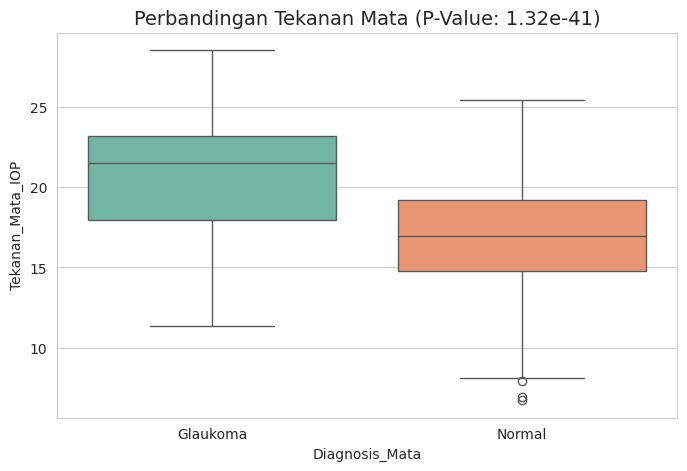

Rata-rata IOP Glaukoma: 20.43
Rata-rata IOP Normal: 16.82
P-Value: 1.3151340869923514e-41
KESIMPULAN: ✅ SIGNIFIKAN. Pasien Glaukoma terbukti memiliki tekanan mata lebih tinggi.


In [ ]:
# ==========================================
# UJI STATISTIK 1: T-TEST (Numerical vs Categorical)
# Pertanyaan: Apakah Tekanan Mata pasien Glaukoma beda signifikan dgn Normal?
# ==========================================

# 1. Pisahkan data
iop_glaukoma = df[df['Diagnosis_Mata'] == 'Glaukoma']['Tekanan_Mata_IOP']
iop_normal = df[df['Diagnosis_Mata'] == 'Normal']['Tekanan_Mata_IOP']

# 2. Lakukan T-Test
t_stat, p_val = stats.ttest_ind(iop_glaukoma, iop_normal)

# 3. Visualisasi (Boxplot)
plt.figure(figsize=(8, 5))
sns.boxplot(x='Diagnosis_Mata', y='Tekanan_Mata_IOP', data=df, palette='Set2')
plt.title(f'Perbandingan Tekanan Mata (P-Value: {p_val:.2e})', fontsize=14)
plt.show()

# 4. Interpretasi Otomatis
print(f"Rata-rata IOP Glaukoma: {iop_glaukoma.mean():.2f}")
print(f"Rata-rata IOP Normal: {iop_normal.mean():.2f}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("KESIMPULAN: ✅ SIGNIFIKAN. Pasien Glaukoma terbukti memiliki tekanan mata lebih tinggi.")
else:
    print("KESIMPULAN: ❌ TIDAK SIGNIFIKAN. Perbedaan hanya kebetulan.")

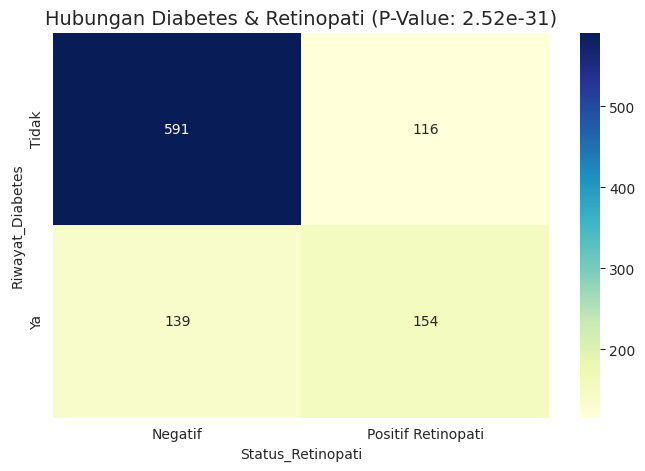

Tabel Observasi:


Status_Retinopati,Negatif,Positif Retinopati
Riwayat_Diabetes,,
Tidak,591,116
Ya,139,154


P-Value: 2.5202453673593953e-31
KESIMPULAN: ✅ SIGNIFIKAN. Diabetes berhubungan erat dengan kejadian Retinopati.
Insight: Pasien Diabetes memiliki risiko lebih tinggi terkena Retinopati.


In [ ]:
# ==========================================
# UJI STATISTIK 2: CHI-SQUARE (Categorical vs Categorical)
# Pertanyaan: Apakah Diabetes berhubungan dengan Retinopati?
# ==========================================

# 1. Buat Tabel Kontingensi (Crosstab)
tabel_silang = pd.crosstab(df['Riwayat_Diabetes'], df['Status_Retinopati'])

# 2. Hitung Chi-Square
chi2, p_val_chi, dof, expected = stats.chi2_contingency(tabel_silang)

# 3. Visualisasi (Heatmap)
plt.figure(figsize=(8, 5))
sns.heatmap(tabel_silang, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Hubungan Diabetes & Retinopati (P-Value: {p_val_chi:.2e})', fontsize=14)
plt.show()

# 4. Interpretasi Otomatis
print("Tabel Observasi:")
display(tabel_silang)
print(f"P-Value: {p_val_chi}")

if p_val_chi < 0.05:
    print("KESIMPULAN: ✅ SIGNIFIKAN. Diabetes berhubungan erat dengan kejadian Retinopati.")
    print("Insight: Pasien Diabetes memiliki risiko lebih tinggi terkena Retinopati.")
else:
    print("KESIMPULAN: ❌ TIDAK SIGNIFIKAN.")